## Linear Regression

Up to this point we have seen how you can get, clean, describe, and visualize data. Once you have a good understanding of your data and have cleaned it up, the next step is typically modeling. 

In this course, modeling will mean using a machine learning technique to learn - from data - the relationship between a set of features and what we hope to predict. Let's bring in some data to make this idea more concrete. 

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target = boston_data.target

Here is some description of our data:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percent lower status of the population
* TARGET - Median value of owner-occupied homes in $1000's

The goal of this dataset if to use the features (everything except the target) to predict the target (median home value). How might we do this? For our first pass, let's simplify the problem. Let's say we just want to use LSAT to predict TARGET. 

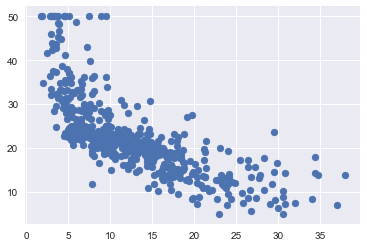

In [4]:
plt.scatter(boston_df['LSTAT'], target)

### Cost / Evaluation Function

How can we tackle this problem? A good place to start one's thinking is: say we develop many models to predict our target, how would we pick the best one? Once we determine this, our goal is then to minimize/maximize that value. 

It is extremely useful if you can reduce your problem to a single evaluation metric because then it makes it very easy to iterate on model development. In industry, though, this can be tricky. Sometimes it isn't extremely clear what you want your model to maximize/minimize. We will discuss this challenge more later in the class, but for now we will stick with pretty standard evaluation functions used today.

So for this problem, I would propose the following evaluation metric: mean squared error (MSE). To understand MSE, let's define some terminology:

* $\hat{y_{i}}$ - this is our predicted value for the ith data point
* $y_{i}$ - this is actual value for the ith data point
* $n$ - the number of data points

Thus, MSE is:

$\frac{1}{n} \sum_{i}{(y_{i} - \hat{y_{i}})^2}$

In English, for each point we subtract our predicted value from the actual. Then, since we don't care about the direction of the error, we square the difference. Lastly, we take the mean of all these values. Basically, we are saying that we want the average distance between our predictions and our actuals to be small. 

You might be wondering, why we squared the value instead of taking the absolute value. It turns out that for some of the following math, squaring the value works out nicely. This does have the effect, though, of weighting large errors more in our average since we are squaring all the differences.

### Our model

Now that we have our cost function, how do we find a way to minimze it? In this lecture we will be reviewing the Linear Regression model. The model is as follows:

$\hat{y_{i}}$ = $\beta_{0} + \sum_{j}{B_{j}x_{j,i}}$

Where $j$ is the number of predictors we have and the $\beta$ values are our coefficients with $\beta_{0}$ being the intercept. Basically, our model is a linear combination of our predictors with an intercept.

Now that we have a model and a cost function, our challenge becomes finding the $\beta$ values for our model that minimize MSE for our data. For linear regression, there is actually a closed form solution called the [normal equation](http://mathworld.wolfram.com/NormalEquation.html). In this lecture, though, we are going to use a different technique that is more common in machine learning - gradient descent.

### Gradient Descent

Gradient descent is a technique we borrow from optimization. It is a very simple, yet powerful algorithm that can be used to find the minimum of a function.

1. Pick a random starting value
2. Take steps proportional to the negative of the gradient at the current point
3. Repeat until you converge

This technique will find the global minimum if a function is convex, if not, we can only prove that it will find a local minimum. Let's take a look at an [example](https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a). 

The first question we need to answer is: is our cost function convex? Let's take a look:

Min MSE: 166790.9803
Coeff: 1


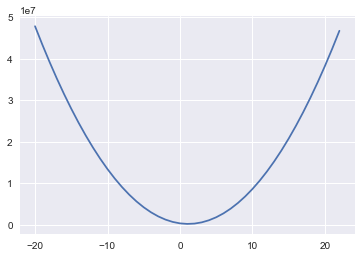

In [5]:
import numpy as np

mses = []
lstat_coef = range(-20, 23)
for coef in lstat_coef:
    pred_values = np.array([coef * lstat for lstat in boston_df.LSTAT.values])
    mses.append(np.sum((target - pred_values)**2))
    
plt.plot(lstat_coef, mses)
print("Min MSE: {}".format(np.min(mses)))
print("Coeff: {}".format(lstat_coef[np.argmin(mses)]))

What we have done above is taken a range of coefficient values for LSTAT and for each one calculated the MSE on our data. If we then plot these we get the above curve - looks pretty convex! And in fact, it turns out that our MSE function with our linear regression model will always be convex! That means we can use gradient descent to find the optimal coefficients for our model!

One reason that gradient descent is more common than the normal equation for machine learning is that it scales much better as our data gets large. It is also a general optimization technique that pops up all over machine learning, so understanding how it works is extremely valuable.

### Gradients

If you look at our pseudocode for gradient descent again, you will see that really all we need to do is calculate gradients. So - what are gradients? You can probably guess from the animations we saw, but they are just the partial derivatives with respect to the coefficients. For each coefficient we have, we will need to calculate the derivatie of our MSE with respect to that coefficient. Let's get started! 

Remeber our cost function: $\frac{1}{n} \sum_{i}{(y_{i} - \hat{y_{i}})^2}$

Now, let's expand it out for our simple example with an intercept and a single variable, LSTAT:

$\frac{1}{n} \sum_{i}{(y_{i} - (\beta_{0} + \beta_{1} * LSTAT_{i}))^2}$

Now, for the derivative of this with respect to $\beta_{0}$, we get:

$\frac{2}{n} \sum_{i}{(y_{i} - (\beta_{0} + \beta_{1} * LSTAT_{i}))}$ * -1

And for $\beta{1}$:

$\frac{2}{n} \sum_{i}{(y_{i} - (\beta_{0} + \beta_{1} * LSTAT_{i}) * -LSTAT_{i})}$

Now, let's see this gradient descent algorithm in code:

In [21]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
lstat_values = boston_df.LSTAT.values
n = len (lstat_values)
for _ in range(10000):
    predicted = beta_0 + beta_1 * lstat_values
    residuals = target - predicted
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(lstat_values) * -1)

In [22]:
beta_0

34.272303577060761

In [23]:
beta_1

-0.93314663629192951

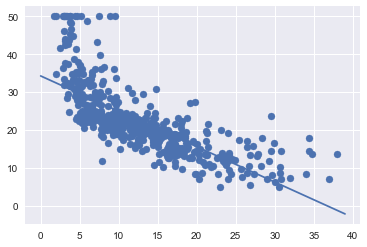

In [24]:
plt.scatter(boston_df['LSTAT'], target)
x = range(0, 40)
plt.plot(x, [beta_0 + beta_1 * l for l in x])

Nice! It looks like it worked! But let's discuss a few things:

1. Learning rate
2. When to stop iterating?
3. Matrix optimizations
4. Normalizing data